In [1]:
import matplotlib
import tensorflow 
import pandas as pd
from tensorflow import keras
matplotlib.use("Agg")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import argparse
import random
import cv2
import os
import glob
import tensorflow as tf
import seaborn as sns
%matplotlib inline

__get list of directories__

In [2]:
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [4]:
import random
imagePaths = getListOfFiles("hcaptcha_dataset/train/")
#imagePaths = sorted(list(paths.list_images(args["dataset"])))## Folder structure: datasets --> sub-folders with labels name
#print(imagePaths)
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
c = 0 
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    labels.append(lable)
    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(img)
    data.append(img)
    
print("training images:",len(data))
print("training labels:",len(labels))
print("first image address in train data",imagePaths[0])
print("shape of the image:",data[0].shape)


training images: 3018
training labels: 3018
first image address in train data hcaptcha_dataset/train/motorcycle/1650230255278_2.jpg
shape of the image: (32, 32, 3)


In [5]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
le = LabelEncoder()
labels = le.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels, test_size=0.20, random_state=42)

print("Training data: ",len(trainX))
print("Shape of training data: ",trainX.shape)
print("Validation data: ",len(testX))
print("validation data Shape: ",testX.shape)

Training data:  2414
Shape of training data:  (2414, 32, 32, 3)
Validation data:  604
validation data Shape:  (604, 32, 32, 3)


In [6]:
#image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         vertical_flip=True, fill_mode="nearest")

# Create a baseline Neural network

In [7]:
epochs=30

In [8]:
tf.random.set_seed(42)

# 1. Create baseline model with above specifications
model = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        tf.keras.layers.Dense(1024,activation='sigmoid'),
                                       tf.keras.layers.Dense(256,activation='sigmoid'),
                                       tf.keras.layers.Dense(64,activation='sigmoid'),
                                       tf.keras.layers.Dense(7,activation="softmax")
])

In [10]:
 model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])

In [11]:
H = model.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)


Epoch 1/30
18/18 [==============================] - 4s 177ms/step - loss: 1.9002 - accuracy: 0.2157 - val_loss: 1.7907 - val_accuracy: 0.2980
Epoch 2/30
18/18 [==============================] - 3s 152ms/step - loss: 1.7107 - accuracy: 0.3626 - val_loss: 1.5497 - val_accuracy: 0.3907
Epoch 3/30
18/18 [==============================] - 3s 160ms/step - loss: 1.5503 - accuracy: 0.3746 - val_loss: 1.4386 - val_accuracy: 0.4238
Epoch 4/30
18/18 [==============================] - 3s 156ms/step - loss: 1.4656 - accuracy: 0.4331 - val_loss: 1.3716 - val_accuracy: 0.4603
Epoch 5/30
18/18 [==============================] - 3s 175ms/step - loss: 1.3784 - accuracy: 0.4873 - val_loss: 1.3197 - val_accuracy: 0.4884
Epoch 6/30
18/18 [==============================] - 3s 151ms/step - loss: 1.3326 - accuracy: 0.4899 - val_loss: 1.3009 - val_accuracy: 0.4570
Epoch 7/30
18/18 [==============================] - 3s 149ms/step - loss: 1.3021 - accuracy: 0.4965 - val_loss: 1.2114 - val_accuracy: 0.5298
Epoch 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 3,426,055
Trainable params: 3,426,055
Non-trainable params: 0
_________________________________________________________________


# Experiment with number of layers and neurons per layer to increase the performance metrics.

In [13]:
model_1 = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        tf.keras.layers.Dense(256,activation='sigmoid'),
                                       tf.keras.layers.Dense(128,activation='sigmoid'),
                                       tf.keras.layers.Dense(64,activation='sigmoid'),
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_1.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_1.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model.summary()


[INFO] compiling model...
Epoch 1/30
18/18 [==============================] - 4s 178ms/step - loss: 1.9188 - accuracy: 0.1951 - val_loss: 1.8518 - val_accuracy: 0.3411
Epoch 2/30
18/18 [==============================] - 3s 151ms/step - loss: 1.8253 - accuracy: 0.2397 - val_loss: 1.7400 - val_accuracy: 0.3791
Epoch 3/30
18/18 [==============================] - 3s 157ms/step - loss: 1.7098 - accuracy: 0.3718 - val_loss: 1.6050 - val_accuracy: 0.3543
Epoch 4/30
18/18 [==============================] - 4s 211ms/step - loss: 1.5880 - accuracy: 0.3762 - val_loss: 1.4957 - val_accuracy: 0.3940
Epoch 5/30
18/18 [==============================] - 2s 137ms/step - loss: 1.5233 - accuracy: 0.4003 - val_loss: 1.4707 - val_accuracy: 0.3874
Epoch 6/30
18/18 [==============================] - 3s 139ms/step - loss: 1.4699 - accuracy: 0.4090 - val_loss: 1.4157 - val_accuracy: 0.4089
Epoch 7/30
18/18 [==============================] - 2s 135ms/step - loss: 1.4525 - accuracy: 0.4484 - val_loss: 1.3819 - v

In [14]:
model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                       tf.keras.layers.Dense(128,activation='sigmoid'),
                                       tf.keras.layers.Dense(64,activation='sigmoid'),
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_2.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_2.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model_2.summary()

Epoch 1/30
18/18 [==============================] - 3s 158ms/step - loss: 1.8904 - accuracy: 0.2262 - val_loss: 1.8014 - val_accuracy: 0.3675
Epoch 2/30
18/18 [==============================] - 2s 134ms/step - loss: 1.7893 - accuracy: 0.3390 - val_loss: 1.7089 - val_accuracy: 0.3659
Epoch 3/30
18/18 [==============================] - 2s 133ms/step - loss: 1.6929 - accuracy: 0.3508 - val_loss: 1.5990 - val_accuracy: 0.3642
Epoch 4/30
18/18 [==============================] - 2s 134ms/step - loss: 1.6069 - accuracy: 0.3915 - val_loss: 1.5110 - val_accuracy: 0.4404
Epoch 5/30
18/18 [==============================] - 2s 131ms/step - loss: 1.5249 - accuracy: 0.4160 - val_loss: 1.4406 - val_accuracy: 0.4487
Epoch 6/30
18/18 [==============================] - 2s 133ms/step - loss: 1.4795 - accuracy: 0.4484 - val_loss: 1.4032 - val_accuracy: 0.5232
Epoch 7/30
18/18 [==============================] - 2s 137ms/step - loss: 1.4249 - accuracy: 0.4694 - val_loss: 1.3598 - val_accuracy: 0.4719
Epoch 

In [15]:
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        
                                      
                                       tf.keras.layers.Dense(64,activation='sigmoid'),
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_3.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_3.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model_3.summary()

Epoch 1/30
18/18 [==============================] - 3s 150ms/step - loss: 1.8622 - accuracy: 0.2594 - val_loss: 1.6353 - val_accuracy: 0.4056
Epoch 2/30
18/18 [==============================] - 2s 131ms/step - loss: 1.6082 - accuracy: 0.4449 - val_loss: 1.5003 - val_accuracy: 0.4487
Epoch 3/30
18/18 [==============================] - 2s 127ms/step - loss: 1.4999 - accuracy: 0.4703 - val_loss: 1.3856 - val_accuracy: 0.4868
Epoch 4/30
18/18 [==============================] - 2s 130ms/step - loss: 1.4344 - accuracy: 0.4812 - val_loss: 1.3225 - val_accuracy: 0.5132
Epoch 5/30
18/18 [==============================] - 2s 131ms/step - loss: 1.3784 - accuracy: 0.5000 - val_loss: 1.2948 - val_accuracy: 0.5778
Epoch 6/30
18/18 [==============================] - 2s 128ms/step - loss: 1.3442 - accuracy: 0.5157 - val_loss: 1.2868 - val_accuracy: 0.5596
Epoch 7/30
18/18 [==============================] - 2s 132ms/step - loss: 1.3146 - accuracy: 0.5317 - val_loss: 1.2167 - val_accuracy: 0.5646
Epoch 

In [16]:
model_4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        
                                      
                                       
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_4.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_4.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model_4.summary()

Epoch 1/30
18/18 [==============================] - 3s 157ms/step - loss: 2.1121 - accuracy: 0.2126 - val_loss: 1.5989 - val_accuracy: 0.3974
Epoch 2/30
18/18 [==============================] - 2s 117ms/step - loss: 1.5562 - accuracy: 0.3858 - val_loss: 1.3380 - val_accuracy: 0.5248
Epoch 3/30
18/18 [==============================] - 2s 121ms/step - loss: 1.3959 - accuracy: 0.4714 - val_loss: 1.2550 - val_accuracy: 0.5695
Epoch 4/30
18/18 [==============================] - 2s 122ms/step - loss: 1.3429 - accuracy: 0.4913 - val_loss: 1.2754 - val_accuracy: 0.4950
Epoch 5/30
18/18 [==============================] - 3s 158ms/step - loss: 1.3204 - accuracy: 0.5149 - val_loss: 1.1634 - val_accuracy: 0.6175
Epoch 6/30
18/18 [==============================] - 3s 153ms/step - loss: 1.2766 - accuracy: 0.5271 - val_loss: 1.1508 - val_accuracy: 0.6010
Epoch 7/30
18/18 [==============================] - 2s 120ms/step - loss: 1.2352 - accuracy: 0.5402 - val_loss: 1.1153 - val_accuracy: 0.6076
Epoch 

In [17]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        tf.keras.layers.Dense(256,activation='sigmoid'),
                                        tf.keras.layers.Dense(128,activation='sigmoid'),
                                       tf.keras.layers.Dense(64,activation='sigmoid'), 
                                       tf.keras.layers.Dense(32,activation='sigmoid'),
                                       tf.keras.layers.Dense(16,activation='sigmoid'),
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_5.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_5.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model_5.summary()

Epoch 1/30
18/18 [==============================] - 4s 170ms/step - loss: 2.0237 - accuracy: 0.1934 - val_loss: 1.9344 - val_accuracy: 0.2136
Epoch 2/30
18/18 [==============================] - 2s 127ms/step - loss: 1.9282 - accuracy: 0.1912 - val_loss: 1.8892 - val_accuracy: 0.2136
Epoch 3/30
18/18 [==============================] - 2s 135ms/step - loss: 1.8977 - accuracy: 0.1995 - val_loss: 1.8732 - val_accuracy: 0.2268
Epoch 4/30
18/18 [==============================] - 2s 135ms/step - loss: 1.8855 - accuracy: 0.2148 - val_loss: 1.8569 - val_accuracy: 0.2268
Epoch 5/30
18/18 [==============================] - 2s 134ms/step - loss: 1.8668 - accuracy: 0.2139 - val_loss: 1.8240 - val_accuracy: 0.2268
Epoch 6/30
18/18 [==============================] - 2s 132ms/step - loss: 1.8231 - accuracy: 0.2668 - val_loss: 1.7629 - val_accuracy: 0.3526
Epoch 7/30
18/18 [==============================] - 2s 135ms/step - loss: 1.7666 - accuracy: 0.3364 - val_loss: 1.7010 - val_accuracy: 0.3642
Epoch 

# 3 Changing activation function

In [18]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        tf.keras.layers.Dense(256,activation='relu'),
                                        tf.keras.layers.Dense(128,activation='relu'),
                                       tf.keras.layers.Dense(64,activation='relu'), 
                                       tf.keras.layers.Dense(32,activation='relu'),
                                       tf.keras.layers.Dense(16,activation='relu'),
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_6.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_6.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model_6.summary()

Epoch 1/30
18/18 [==============================] - 4s 164ms/step - loss: 1.7821 - accuracy: 0.2528 - val_loss: 1.4746 - val_accuracy: 0.3990
Epoch 2/30
18/18 [==============================] - 2s 129ms/step - loss: 1.4982 - accuracy: 0.4077 - val_loss: 1.4019 - val_accuracy: 0.4437
Epoch 3/30
18/18 [==============================] - 2s 133ms/step - loss: 1.3993 - accuracy: 0.4589 - val_loss: 1.3938 - val_accuracy: 0.4321
Epoch 4/30
18/18 [==============================] - 2s 136ms/step - loss: 1.3853 - accuracy: 0.4707 - val_loss: 1.3088 - val_accuracy: 0.5116
Epoch 5/30
18/18 [==============================] - 2s 132ms/step - loss: 1.3637 - accuracy: 0.4703 - val_loss: 1.2314 - val_accuracy: 0.5199
Epoch 6/30
18/18 [==============================] - 2s 135ms/step - loss: 1.2632 - accuracy: 0.5219 - val_loss: 1.2118 - val_accuracy: 0.5629
Epoch 7/30
18/18 [==============================] - 2s 134ms/step - loss: 1.2281 - accuracy: 0.5359 - val_loss: 1.1585 - val_accuracy: 0.5381
Epoch 

In [19]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                        
                                        tf.keras.layers.Dense(128,activation='tanh'),
                                       tf.keras.layers.Dense(64,activation='tanh'), 
                                      
                                       tf.keras.layers.Dense(7,activation="softmax")
])


model_7.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])


H=model_7.fit(x=aug.flow(trainX, trainY, batch_size=128),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // 128,
              epochs=30, verbose=1)

model_7.summary()

Epoch 1/30
18/18 [==============================] - 3s 157ms/step - loss: 1.8833 - accuracy: 0.2983 - val_loss: 1.5453 - val_accuracy: 0.3692
Epoch 2/30
18/18 [==============================] - 2s 135ms/step - loss: 1.5010 - accuracy: 0.3924 - val_loss: 1.3921 - val_accuracy: 0.4421
Epoch 3/30
18/18 [==============================] - 2s 133ms/step - loss: 1.3812 - accuracy: 0.4899 - val_loss: 1.3232 - val_accuracy: 0.5083
Epoch 4/30
18/18 [==============================] - 2s 134ms/step - loss: 1.3438 - accuracy: 0.4887 - val_loss: 1.2677 - val_accuracy: 0.4669
Epoch 5/30
18/18 [==============================] - 2s 131ms/step - loss: 1.3074 - accuracy: 0.5017 - val_loss: 1.2029 - val_accuracy: 0.5414
Epoch 6/30
18/18 [==============================] - 3s 140ms/step - loss: 1.2370 - accuracy: 0.5267 - val_loss: 1.1284 - val_accuracy: 0.5662
Epoch 7/30
18/18 [==============================] - 2s 126ms/step - loss: 1.1827 - accuracy: 0.5604 - val_loss: 1.1483 - val_accuracy: 0.5911
Epoch 

# 4 Experiment with regularization techniques: Early stopping, Dropout rate, L1 for sparse model

# Dropout layer

In [64]:
model_drop = Sequential()

model_drop.add(Flatten(input_shape=(32,32,3)))
model_drop.add(Dropout(0.1))
model_drop.add(Dense(1024, activation='relu'))
model_drop.add(Dense(256, activation='relu'))
model_drop.add(Dense(7, activation='softmax'))

In [65]:
model_drop.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [66]:
H_drop=model_drop.fit(x=aug.flow(trainX, trainY, batch_size=64),
              validation_data=(testX, testY), 
              epochs=30, verbose=1)

Epoch 1/30
38/38 [==============================] - 4s 88ms/step - loss: 2.2470 - accuracy: 0.3036 - val_loss: 1.4059 - val_accuracy: 0.4570
Epoch 2/30
38/38 [==============================] - 3s 86ms/step - loss: 1.3980 - accuracy: 0.4606 - val_loss: 1.2417 - val_accuracy: 0.5149
Epoch 3/30
38/38 [==============================] - 3s 90ms/step - loss: 1.2871 - accuracy: 0.5116 - val_loss: 1.2425 - val_accuracy: 0.5315
Epoch 4/30
38/38 [==============================] - 3s 90ms/step - loss: 1.2353 - accuracy: 0.5232 - val_loss: 1.1230 - val_accuracy: 0.5844
Epoch 5/30
38/38 [==============================] - 3s 91ms/step - loss: 1.1783 - accuracy: 0.5584 - val_loss: 1.0003 - val_accuracy: 0.6358
Epoch 6/30
38/38 [==============================] - 3s 82ms/step - loss: 1.1490 - accuracy: 0.5671 - val_loss: 0.9891 - val_accuracy: 0.6474
Epoch 7/30
38/38 [==============================] - 4s 92ms/step - loss: 1.1060 - accuracy: 0.5907 - val_loss: 1.0169 - val_accuracy: 0.6457
Epoch 8/30
38

Text(0.5, 0, 'epochs')

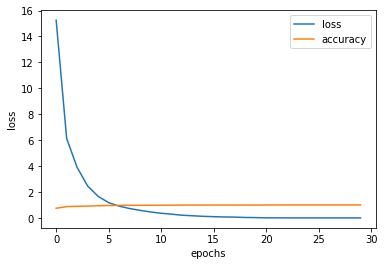

In [67]:
pd.DataFrame(H.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# b) L1  for sparse model

In [24]:
from keras import regularizers

In [25]:
model_L1 = Sequential()

model_L1.add(Flatten(input_shape=(32,32,3)))
model_L1.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l1(0.0000001)))
model_L1.add(Dense(256, activation='relu'))
model_L1.add(Dense(7, activation='softmax'))

In [26]:
model_L1.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
H=model_L1.fit(x=aug.flow(trainX, trainY, batch_size=64),
              validation_data=(testX, testY), 
              epochs=30,verbose=1)


Epoch 1/30
38/38 [==============================] - 5s 113ms/step - loss: 2.3343 - accuracy: 0.3049 - val_loss: 1.4008 - val_accuracy: 0.4603
Epoch 2/30
38/38 [==============================] - 4s 109ms/step - loss: 1.3593 - accuracy: 0.4751 - val_loss: 1.3743 - val_accuracy: 0.4735
Epoch 3/30
38/38 [==============================] - 4s 112ms/step - loss: 1.3939 - accuracy: 0.4635 - val_loss: 1.1480 - val_accuracy: 0.5662
Epoch 4/30
38/38 [==============================] - 4s 101ms/step - loss: 1.2287 - accuracy: 0.5348 - val_loss: 1.0608 - val_accuracy: 0.6192
Epoch 5/30
38/38 [==============================] - 4s 103ms/step - loss: 1.2119 - accuracy: 0.5597 - val_loss: 1.1330 - val_accuracy: 0.5546
Epoch 6/30
38/38 [==============================] - 4s 99ms/step - loss: 1.1465 - accuracy: 0.5684 - val_loss: 1.0425 - val_accuracy: 0.6258
Epoch 7/30
38/38 [==============================] - 4s 107ms/step - loss: 1.1337 - accuracy: 0.5771 - val_loss: 0.9748 - val_accuracy: 0.6523
Epoch 8

Text(0.5, 0, 'epochs')

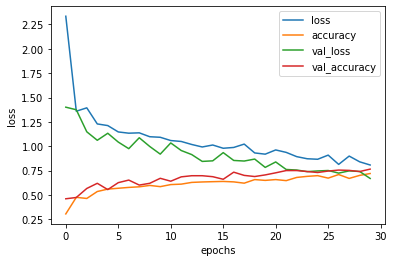

In [28]:
pd.DataFrame(H.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Early stoppping

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
model_er = Sequential()

model_er.add(Flatten(input_shape=(32,32,3)))
model_er.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l1(0.0000001)))
model_er.add(Dense(256, activation='relu'))
model_er.add(Dense(7, activation='softmax'))

In [31]:
model_er.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model_er.fit(x=aug.flow(trainX, trainY,batch_size=64), epochs=30, validation_data=(testX, testY)
 , callbacks = [EarlyStopping(monitor='val_accuracy', patience=4)])

Epoch 1/30
38/38 [==============================] - 6s 126ms/step - loss: 2.2334 - accuracy: 0.3177 - val_loss: 1.5057 - val_accuracy: 0.4156
Epoch 2/30
38/38 [==============================] - 4s 103ms/step - loss: 1.4366 - accuracy: 0.4557 - val_loss: 1.3908 - val_accuracy: 0.4371
Epoch 3/30
38/38 [==============================] - 4s 101ms/step - loss: 1.2954 - accuracy: 0.5124 - val_loss: 1.1391 - val_accuracy: 0.5811
Epoch 4/30
38/38 [==============================] - 4s 102ms/step - loss: 1.2356 - accuracy: 0.5240 - val_loss: 1.1682 - val_accuracy: 0.5662
Epoch 5/30
38/38 [==============================] - 4s 105ms/step - loss: 1.1631 - accuracy: 0.5530 - val_loss: 1.0733 - val_accuracy: 0.5927
Epoch 6/30
38/38 [==============================] - 4s 106ms/step - loss: 1.1897 - accuracy: 0.5613 - val_loss: 1.0808 - val_accuracy: 0.6043
Epoch 7/30
38/38 [==============================] - 4s 113ms/step - loss: 1.1862 - accuracy: 0.5555 - val_loss: 0.9826 - val_accuracy: 0.6374
Epoch 

# Experiments with optimizers

# Predicting on test data 

In [59]:
imagePaths = getListOfFiles("hcaptcha_dataset/test/")
#imagePaths = sorted(list(paths.list_images(args["dataset"])))## Folder structure: datasets --> sub-folders with labels name


data = []
labels = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    labels.append(lable)
    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(img)
    data.append(img)
    
print("test images:",len(data))
print("test labels:",len(labels))
print("first image address in test data",imagePaths[0])
print(data[0].shape)

test images: 746
test labels: 746
first image address in test data hcaptcha_dataset/test/airplane/1650246217769_16.jpg
(32, 32, 3)


In [60]:
data = np.array(data, dtype="float") 
labels = np.array(labels)
le = LabelEncoder()
labels = le.fit_transform(labels)


In [62]:
probs=model_final.predict(data)
y_preds = probs.argmax(axis=1)

In [49]:
submission = pd.DataFrame({'predictions': y_preds.tolist() })
submission.to_csv("my_submission.csv", index=True)

In [50]:
predicted=pd.read_csv("my_submission.csv")